# clustering with scikit-learn

[Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

## Data

In [60]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [61]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [62]:
df.shape

(2240, 29)

In [63]:
## we extract year from Dt_Customer
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df['Year_DtCustomer'] = df['Dt_Customer'].dt.year 


/tmp/ipykernel_5129/3344821484.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


In [64]:
df.Year_DtCustomer.unique()

array([2012, 2014, 2013])

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [66]:
# we will Drop ID ,'Dt_Customer','Z_CostContact'and 'Z_Revenue' the last two have onlye one unique value 
df.drop(columns=['ID','Dt_Customer','Z_CostContact','Z_Revenue'],inplace=True)

## Replace null data 

In [67]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Year_DtCustomer         0
dtype: int64

<Axes: xlabel='Income', ylabel='Count'>

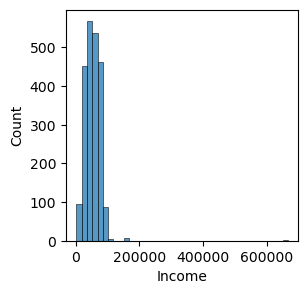

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(data=df, x="Income", bins=40)

In [ ]:

##fil missing avlues in Income with the median 
df.fillna(df['Income'].median(), inplace=True)

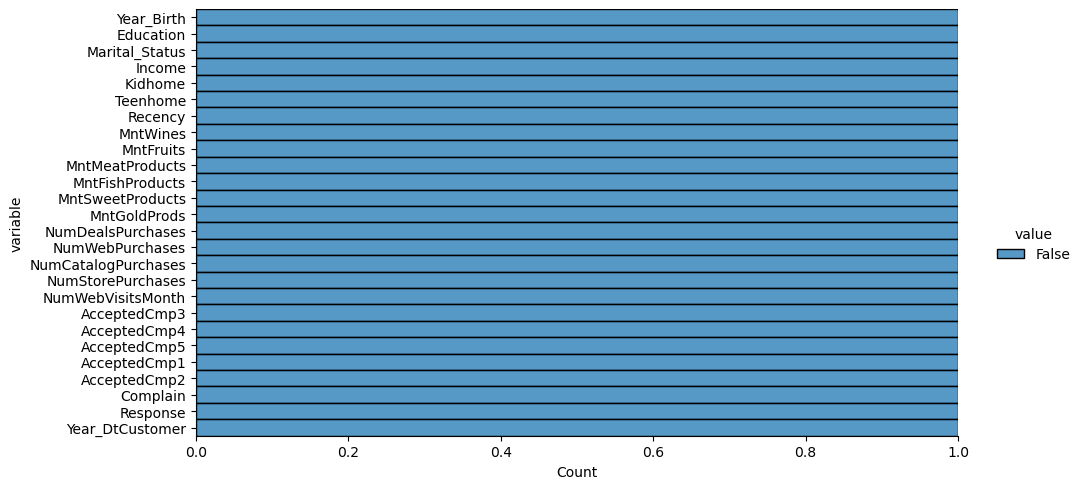

In [ ]:
###check missing values
df.isnull().melt().pipe(lambda df:  
                                      sns.displot(
                                          data=df,
                                          y="variable",
                                          hue="value",
                                          multiple="fill",
                                          aspect=2
                                      ) )

## Duplicated Data 

In [ ]:
# we check data suplicated 
print("There are =>",df.duplicated().sum())
df[df.duplicated()]

There are => 182


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_DtCustomer
83,1963,Master,Together,38620.0,0,0,56,112,17,44,...,3,3,0,0,0,0,0,0,0,2013
179,1951,2n Cycle,Married,78497.0,0,0,44,207,26,447,...,12,2,0,0,0,1,0,0,0,2013
281,1976,Graduation,Together,51369.0,0,1,84,297,7,79,...,4,8,0,0,0,0,0,0,0,2012
282,1946,Graduation,Together,37760.0,0,0,20,84,5,38,...,6,7,0,0,0,0,0,0,0,2012
363,1978,PhD,Married,37717.0,1,0,31,9,0,6,...,2,9,0,0,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1978,Graduation,Together,22775.0,1,0,40,5,1,8,...,2,8,0,0,0,0,0,0,0,2013
2221,1982,Master,Single,75777.0,0,0,12,712,26,538,...,11,1,0,1,1,0,0,0,1,2013
2225,1968,Graduation,Together,58554.0,1,1,55,368,24,68,...,6,7,0,0,0,0,0,0,0,2012
2234,1974,Graduation,Married,34421.0,1,0,81,3,3,7,...,2,7,0,0,0,0,0,0,0,2013


## Removing duplicates

In [ ]:

df.drop_duplicates(inplace=True)


In [ ]:
df[df.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_DtCustomer


## Detecting outlayers

In [ ]:
int_cols = df.select_dtypes(exclude=['object']).columns
int_cols
cols= ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']


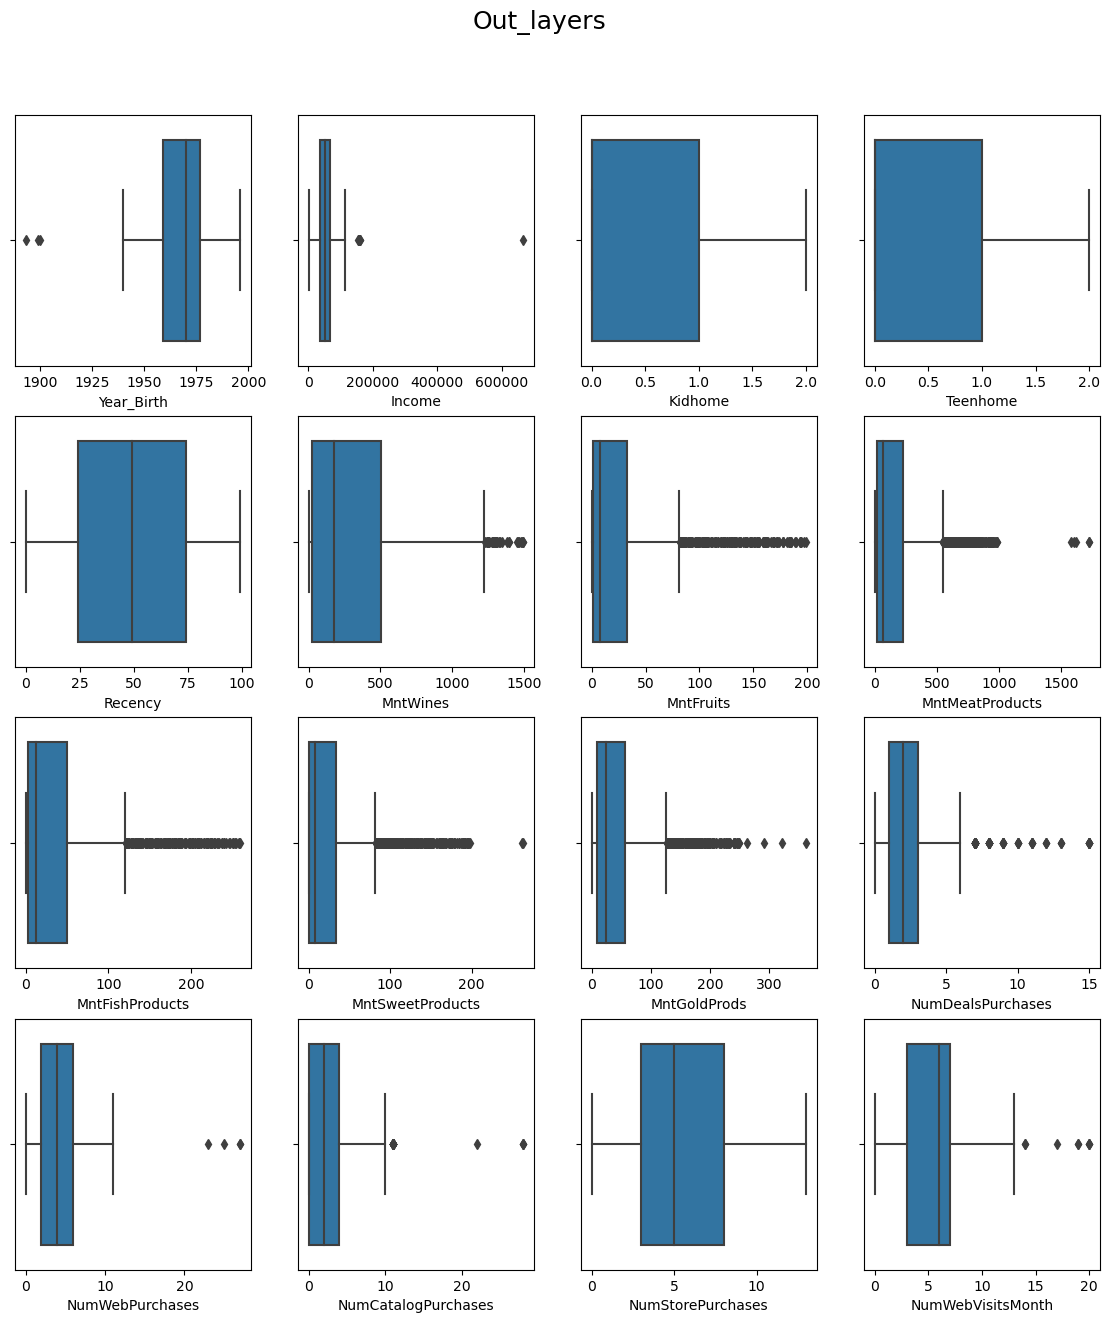

In [ ]:
fig = plt.figure(figsize = (14,15))
fig.suptitle("Out_layers", fontsize=18, y=0.95)
for i,col in enumerate(cols):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(data=df, x=col, ax=ax)
plt.show()

In [ ]:
#fucntions to establish, detect and repalce out_layers 

## ectract low limit and upper limit 
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.15)
    quartile3 = dataframe[variable].quantile(0.85)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()


def sum_out_layers(dataframe, variable):
    lista=[]
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    for i in dataframe[variable]:
         if i  < low_limit or i > up_limit:
            lista.append(i)
    return len(lista) 
    

def index_out_layers(dataframe, variable):
    index=[]
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    index.append(list(np.where((df[variable] < low_limit) | (df[variable] > up_limit))[0]))
    return index[0]


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] ), variable] = up_limit



### Table of number of out layers by feature

In [ ]:
###make a table of out layers by feature
cols= ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

lol= pd.DataFrame()
for i in cols:
    lista= sum_out_layers(df, i)
    lol[i]= [lista]
    Outlayers=lol.T
    Outlayers.columns=["Number_out_layer"]

Outlayers.sort_values(by="Number_out_layer",ascending=False)
     


,Number_out_layer
MntFruits,54
MntSweetProducts,53
NumDealsPurchases,30
MntFishProducts,27
MntGoldProds,23
Income,8
MntMeatProducts,6
NumWebVisitsMonth,5
NumWebPurchases,4
NumCatalogPurchases,4


### Extracting row index that have out_layers 

In [ ]:
#extract index  
list_drop_out_layers=[]
for i in cols:
    index=index_out_layers(df, i)
    for j in index:
        list_drop_out_layers.append(j)


##make  alist of unique values of index 
list_drop_unique=[]
 
for b in list_drop_out_layers: 
    if b not in list_drop_unique: 
        list_drop_unique.append(b) 

len(list_drop_unique) #number of out layers





177

#### removing outlayers 

In [ ]:
## with the list generated we can drop the out_layers
#df_out= df.drop(list_drop_unique)  
df_out=df.drop(df.index[list_drop_unique])  

In [ ]:
print("df with out layers" ,df.shape)
print("df_without out layers", df_out.shape)

df with out layers (2058, 26)
df_without out layers (1881, 26)


### Correlationm between variables 

/tmp/ipykernel_5129/3661400910.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_out.corr(), annot=True, cmap='coolwarm')


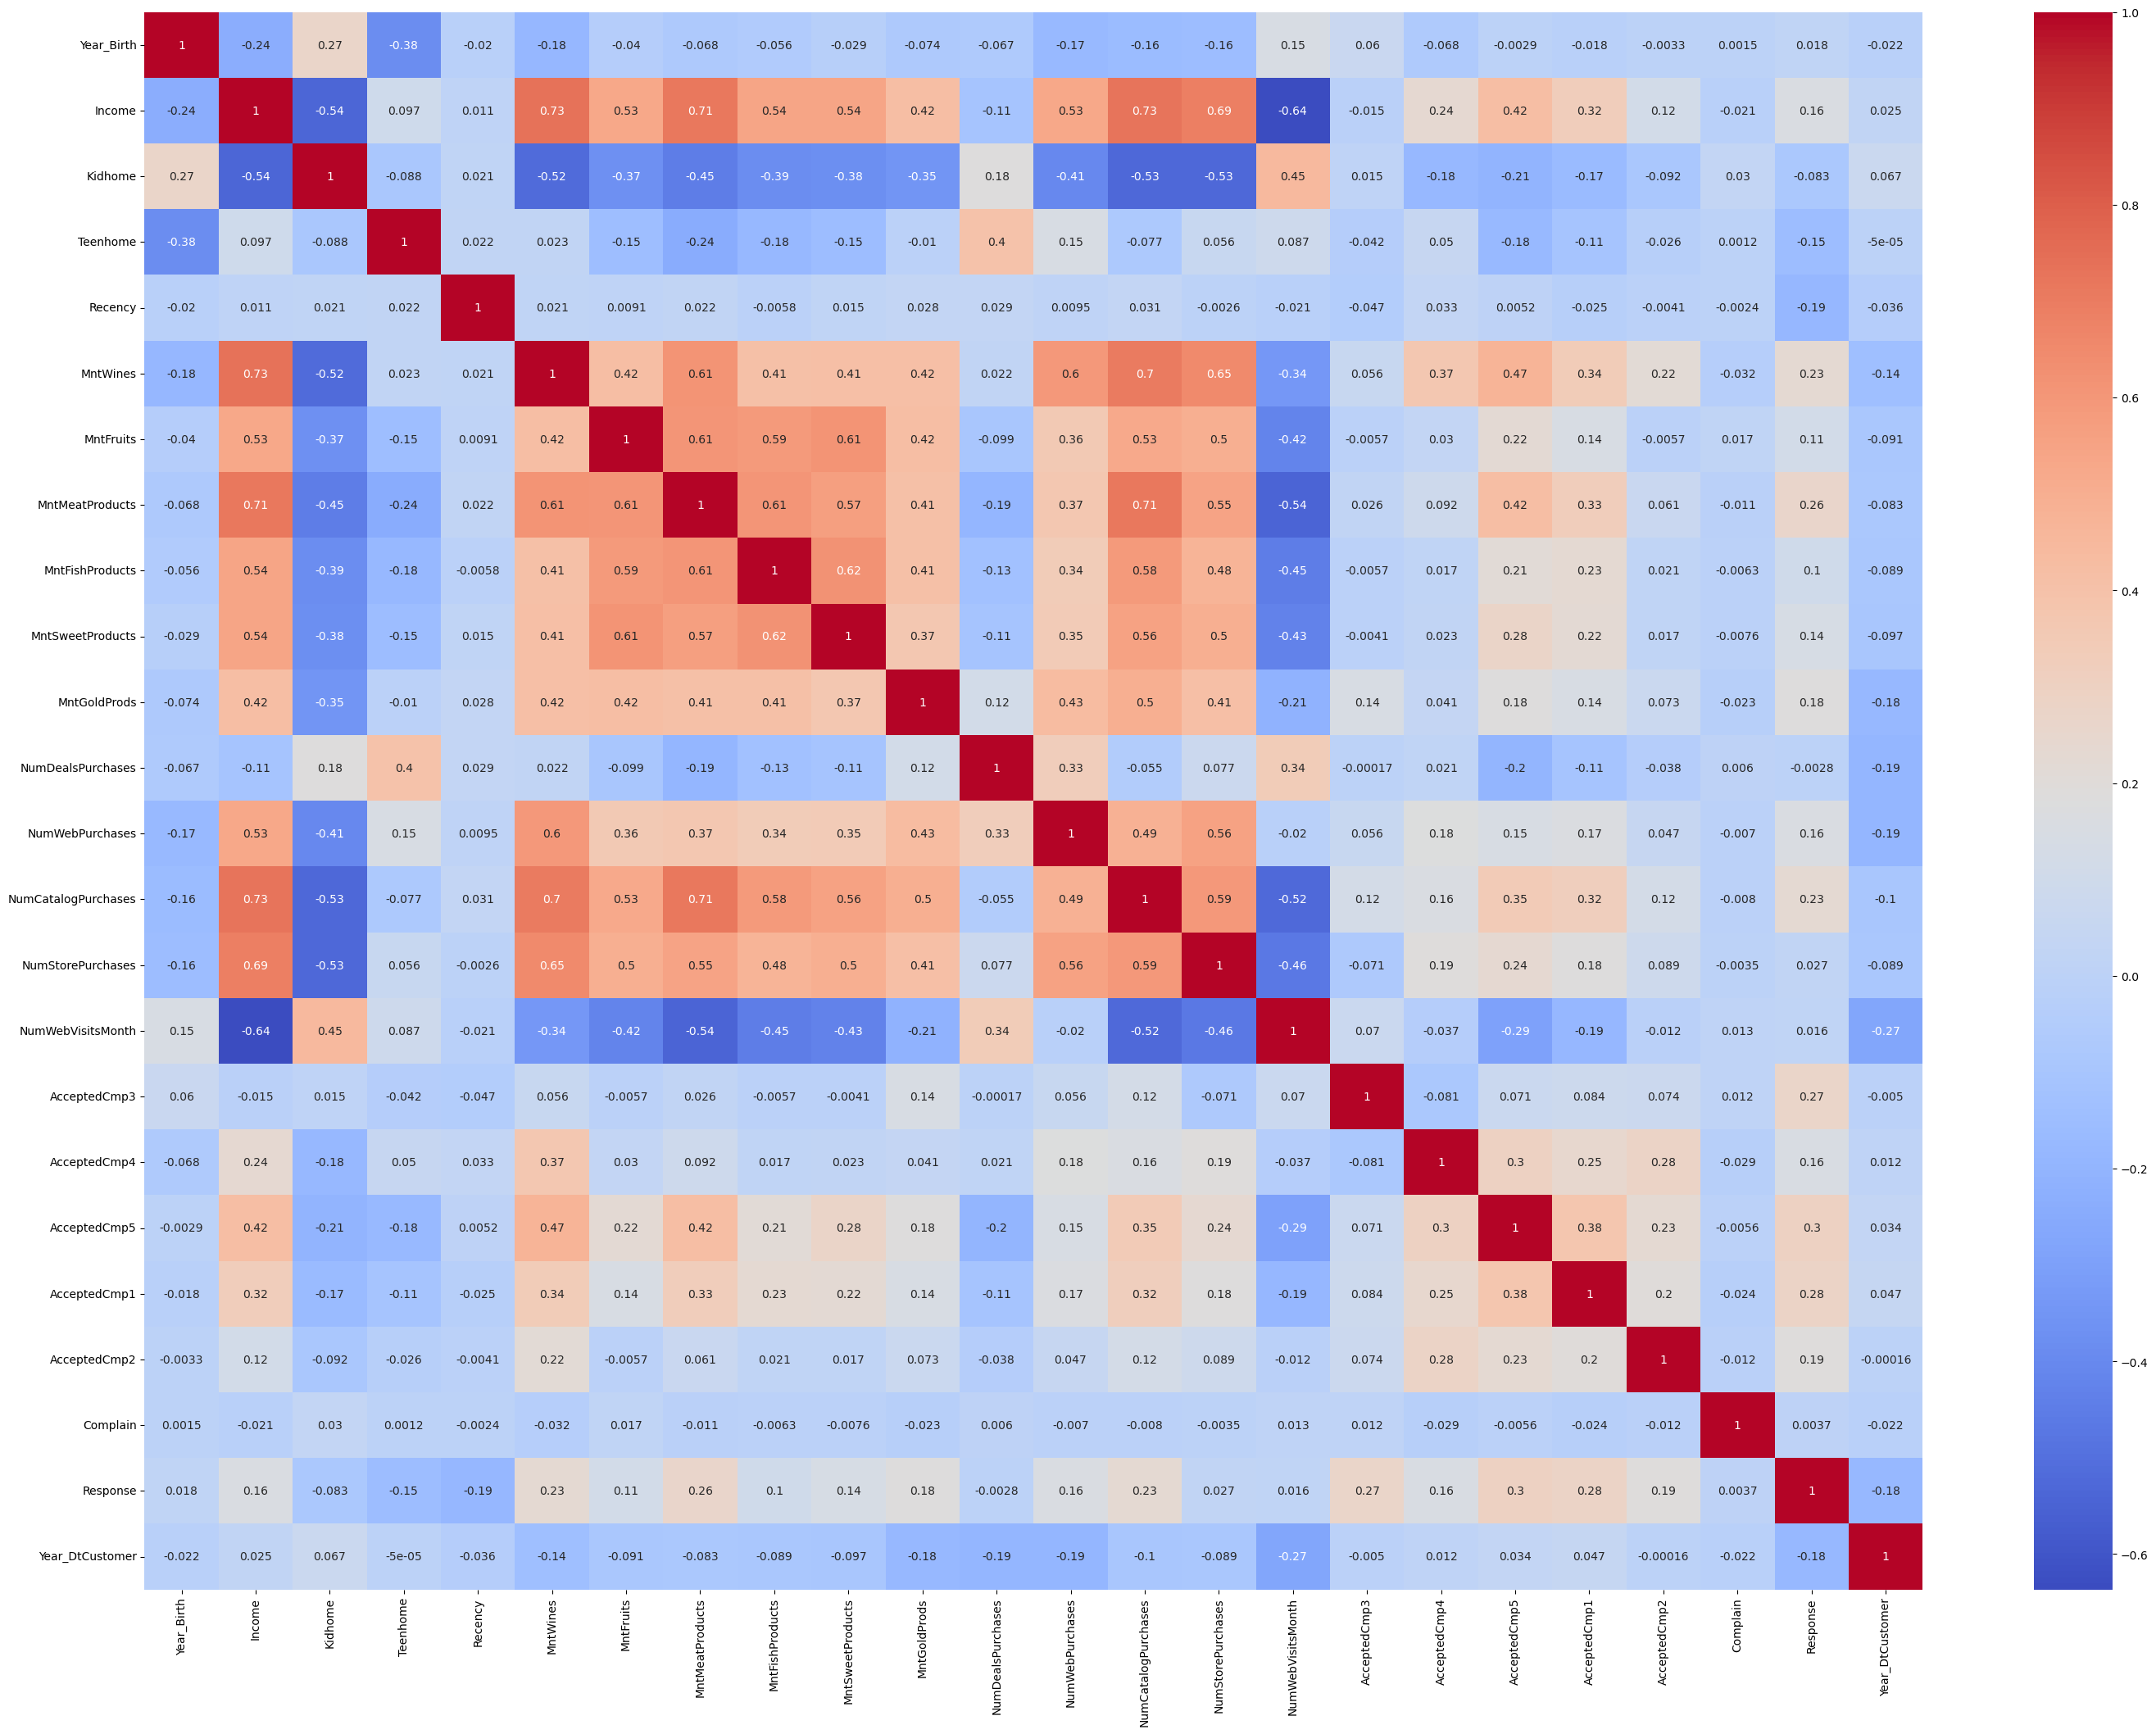

In [ ]:
fig = plt.figure(figsize=(35,25))
sns.heatmap(df_out.corr(), annot=True, cmap='coolwarm')
plt.show()

##### There is no high correlation between variables 

## Preparing Data for Transofromation of categorial variables 

In [ ]:
df_out[["Education","Income"]].groupby(["Education"]).mean().sort_values(by="Income")

,Income
Education,
Basic,19913.346939
2n Cycle,45576.538462
Graduation,49839.558342
Master,52166.057276
PhD,54658.281324


##### we'll use ordinal ecndoer for Education 

In [ ]:
## We will Drop rows with YOLO and and Absurd in marital status 
df_out.Marital_Status.value_counts()

Married     730
Together    479
Single      405
Divorced    198
Widow        63
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [ ]:
df_out = df_out[ (df_out['Marital_Status'] != "YOLO") & (df_out['Marital_Status'] != "Absurd")]

In [ ]:
df_out.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

## Transformation of categorical variables of Data with Sklearn

In [ ]:
import sklearn.compose
import sklearn.preprocessing

In [ ]:

transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(categories=[['Basic','2n Cycle','Graduation','Master','PhD']]), ["Education"]), 
    (sklearn.preprocessing.OneHotEncoder(), ["Marital_Status"]), 
    (sklearn.preprocessing.OneHotEncoder(), ["Year_DtCustomer"]),# there are only 3 values in "Year_DtCustomer" so  we are going to treat these data as categories
    remainder="passthrough")

In [ ]:
#fit and transform the data 
df_transformed = (
    pd.DataFrame(
        transformer.fit_transform(df_out), 
        columns = transformer.get_feature_names_out(), 
        index = df_out.index ))

In [ ]:
##remove prefix form the columns 
df_transformed
df_transformed.columns = df_transformed.columns.str.lstrip("ordinalencoder__")
df_transformed.columns = df_transformed.columns.str.lstrip("onehotencoder-1__")
df_transformed.columns = df_transformed.columns.str.lstrip("remainder_")


In [ ]:
#check the data 
df_transformed

,Education,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,2__Year_DtCustomer_2012,2__Year_DtCustomer_2013,2__Year_DtCustomer_2014,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2232,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2237,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
(
    transformer
    .named_transformers_
    .get("ordinalencoder")
    .categories 
)

[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]

##  Data Scaling  

In [ ]:
##list of numerical data thatwe are goning to  sacle 
list_sc=['Income','Recency', 'MntWines', 'MntFruits', 'Year_Birth',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',]
##

In [ ]:
##Transformation of Data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled= df_transformed.copy()
df_scaled[list_sc] = scaler.fit_transform(df_scaled[list_sc])


In [ ]:
df_scaled.head(3)

,Education,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,2__Year_DtCustomer_2012,2__Year_DtCustomer_2013,2__Year_DtCustomer_2014,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.864758,-0.514429,0.694781,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.536488,-1.144013,-0.196475,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.158572,1.374324,-0.642103,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA (dimensionality reduction)

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
pca = PCA()
pca.fit(df_scaled)
pca_data_scaled = pca.transform(df_scaled)


In [ ]:
var = pca.explained_variance_ratio_ 
len(var)

33

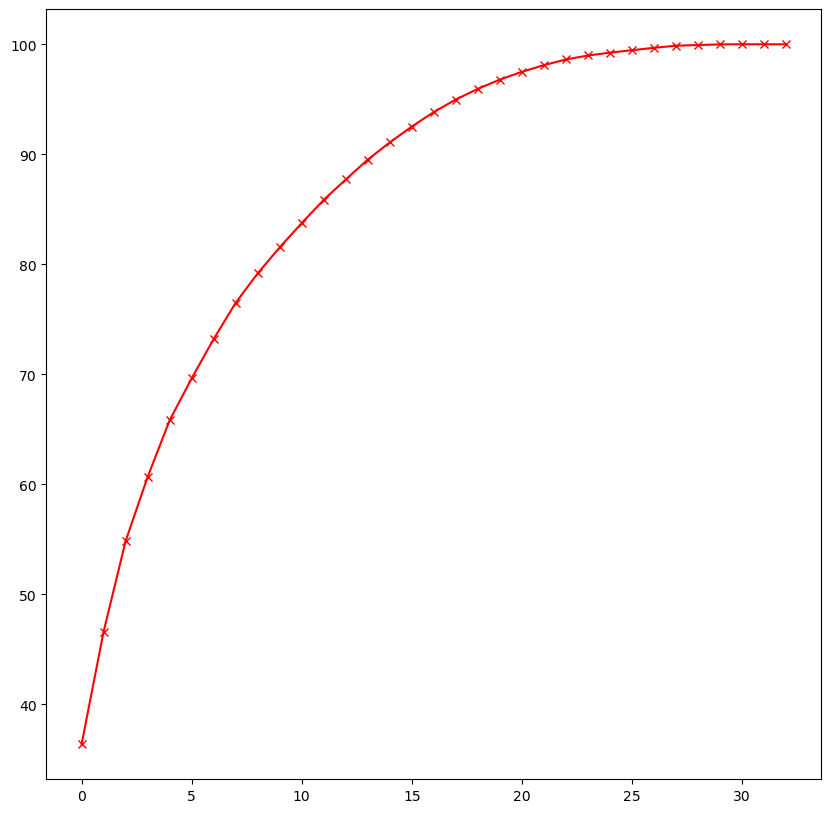

In [ ]:
##now we are goingo to see the number of components we are going to use
cum_var = np.cumsum(np.round(var, decimals=4)*100)  
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [ ]:
#the first 15 components explian 91% of the variance 
sum(var[0:15])

0.9107210521591764

In [ ]:
# we have 33 components we only need the first 15
len(var)

33

In [ ]:
lst = [i for i in range(15,33)]
lst

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

In [ ]:
pca_data_standard = pd.DataFrame(pca_data_scaled) ##hacemos un DataFrame de los resutados deel PCA
pca_data_standard.drop(lst,axis=1, inplace=True)

In [ ]:
pca_data_standard.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.632937,0.005697,2.003644,-0.268174,-0.611779,-0.815136,2.455699,-1.317914,2.002568,0.291618,0.195045,-0.474716,-0.079290,0.030858,-0.467172
1,-2.065609,-0.428885,-1.038322,0.042237,-1.508903,0.121955,-0.173028,0.067849,0.627768,0.488601,0.587145,-0.280438,-0.288586,-0.167077,0.064089
2,2.247660,-0.268139,0.186078,0.835180,-0.672728,-0.185715,-0.376822,-0.729521,-1.062319,-0.909506,-1.261352,-1.083549,-0.695985,-0.409250,-0.182868


## Clustering (K-means)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score



In [ ]:
Sum_of_squared_distances = []
silhouette_scores = [] 
calinski=[]
K = range(2,8) 
for i in K:
    km = KMeans(n_clusters = i) 
    y = km.fit_predict(pca_data_standard) 
    Sum_of_squared_distances.append(km.inertia_) 
    silhouette_scores.append(silhouette_score(pca_data_standard,y)) 
    calinski.append(calinski_harabasz_score(pca_data_standard, y))

/home/santiago/anaconda3/envs/algebra/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/santiago/anaconda3/envs/algebra/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/santiago/anaconda3/envs/algebra/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/santiago/anaconda3/envs/algebra/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

## Determining the number of K 

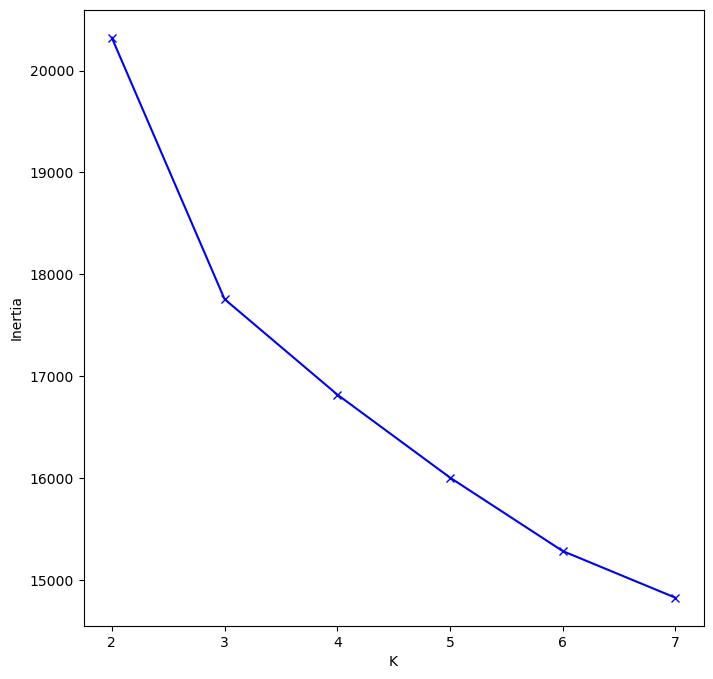

In [ ]:
## elbow plot of inertia
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

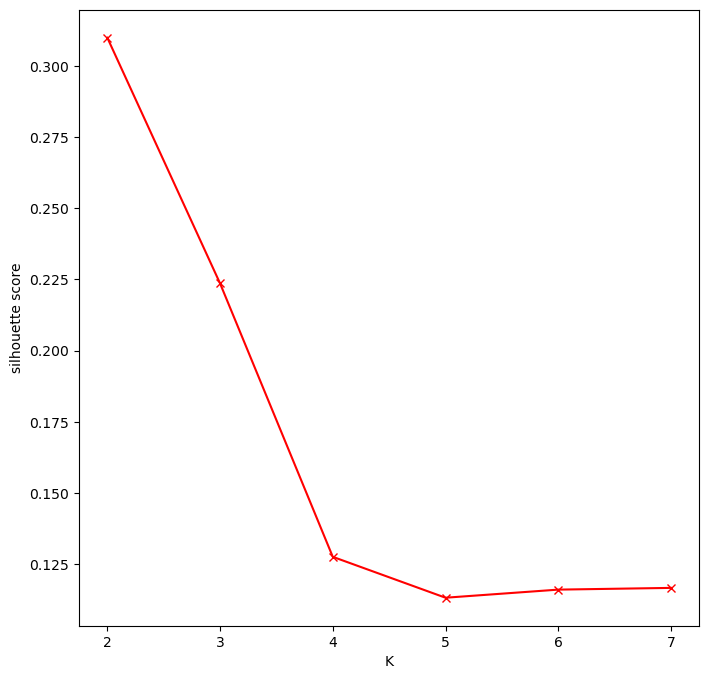

In [ ]:
# silhouette score
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

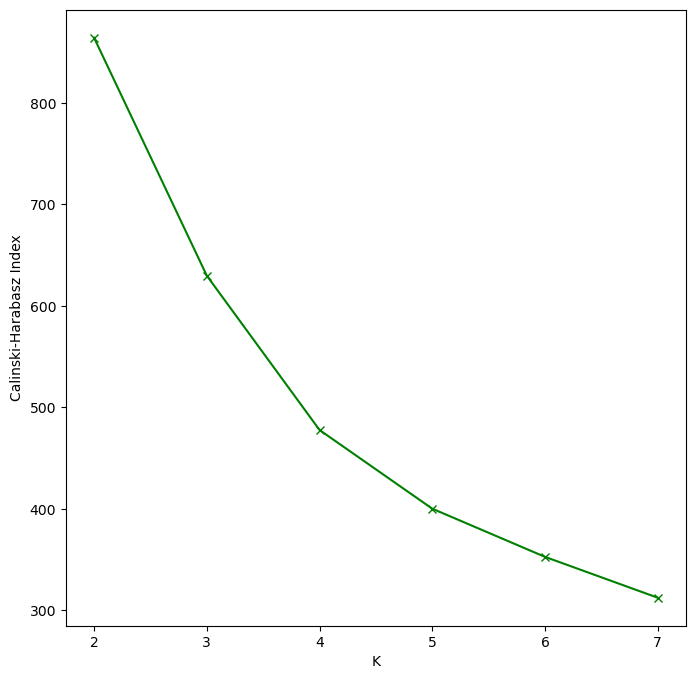

In [ ]:
# Calinski-Harabasz Index
fig = plt.figure(figsize=(8,8))
plt.plot(K, calinski, 'gx-')
plt.xlabel('K')
plt.ylabel("Calinski-Harabasz Index")
plt.show()

The Best k is between 2 and 3. Inertia give us k=3  but the best silhouette_score
was k=2, and also Calinski-Harabasz Index

In [ ]:
km = KMeans(n_clusters = 3)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_out['k_means_pca'] = y

/home/santiago/anaconda3/envs/algebra/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.22358377726269066


 ## Ploting results

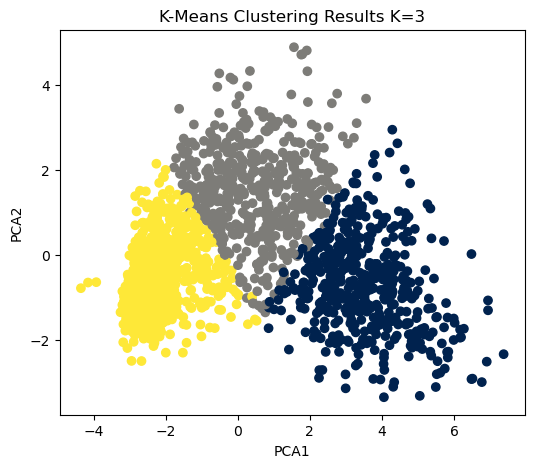

In [ ]:
fig = plt.figure(figsize=(6,5))
plt.scatter(pca_data_scaled[:, 0], pca_data_scaled[:, 1], c=y, cmap='cividis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Results K=3')

plt.show()


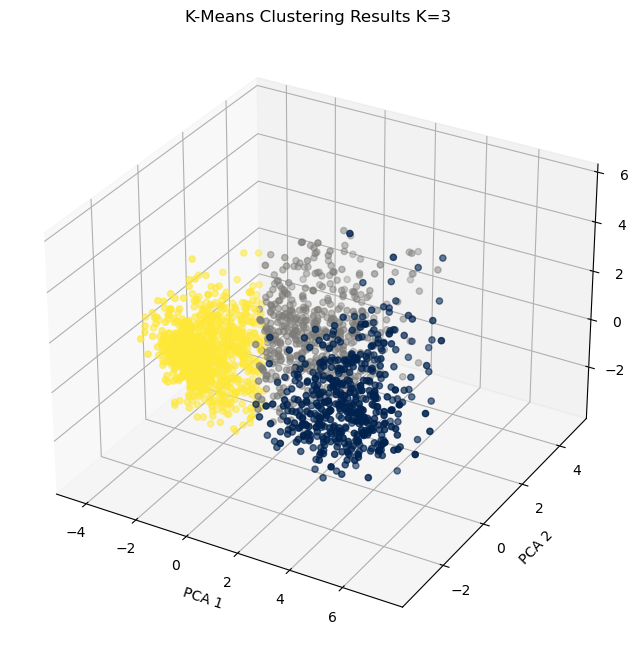

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data_scaled[:, 0], pca_data_scaled[:, 1],pca_data_scaled[:, 2], c=y, cmap='cividis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('K-Means Clustering Results K=3')
plt.show()


## SilhouetteVisualizer

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer 

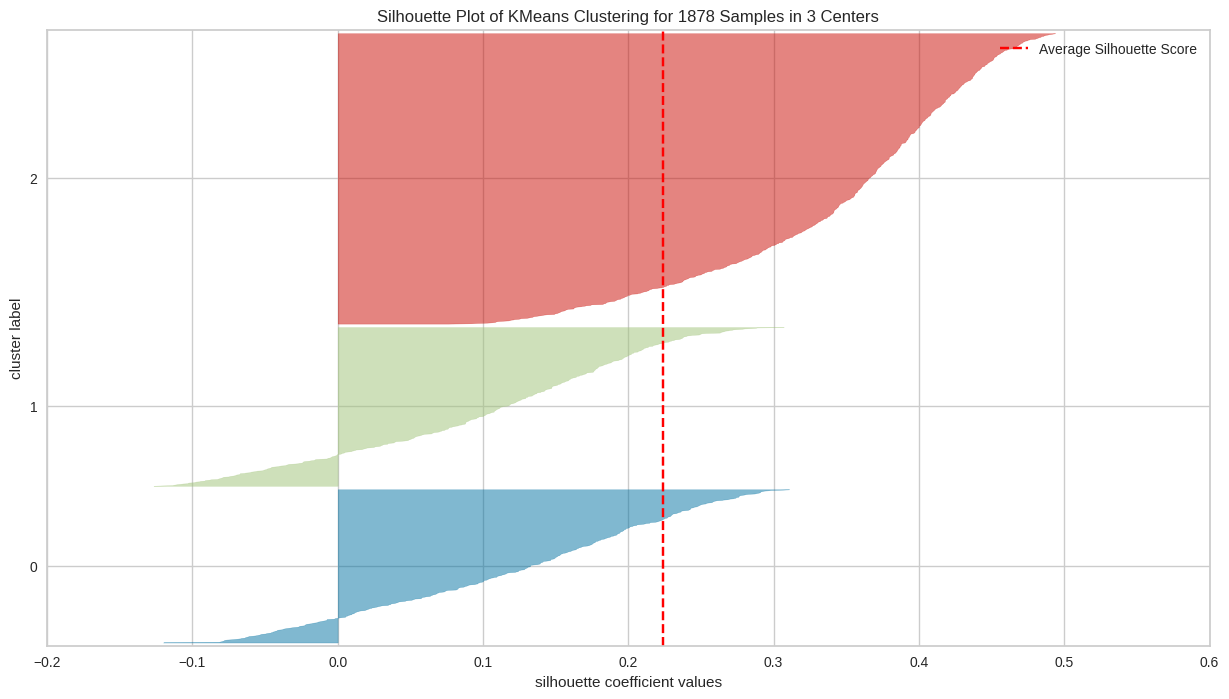

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1878 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pca_data_standard, )
visualizer.show()


## Some parameters in the  clusters

In [73]:
##clsuter2 
clu2=df_out[df_out['k_means_pca']==2]
clu2.Income.mean()
clu2.Income.describe()

count      905.000000
mean     34498.243094
std      12061.679997
min       3502.000000
25%      25851.000000
50%      34421.000000
75%      42664.000000
max      69139.000000
Name: Income, dtype: float64

In [74]:
# cluster 0
clu0=df_out[df_out['k_means_pca']==0]
clu0.Income.mean()
clu0.Income.describe()

count       478.000000
mean      73649.997908
std       10721.776481
min       31907.000000
25%       67430.500000
50%       74140.500000
75%       81031.750000
max      101970.000000
Name: Income, dtype: float64

In [75]:
#cluster 1 
clu1=df_out[df_out['k_means_pca']==1]
clu1.Income.mean()
clu1.Income.describe()

count      495.000000
mean     56087.259596
std      10591.832430
min      24401.000000
25%      49092.000000
50%      56253.000000
75%      63793.500000
max      93404.000000
Name: Income, dtype: float64